In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress



In [2]:
data = pd.read_csv("boat_data.csv")
location_dropped= data.dropna(subset=["Location"])


location_dropped.sort_values("Number of views last 7 days",ascending=False).head(10)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
9580,CHF 14900,Motor Yacht,Bayliner power boats,"Used boat,Unleaded",1992,7.70,2.46,Plastic,Switzerland Â» Le Landeron (NE),3263
8723,CHF 35000,Hardtop,Princess power boats,"Used boat,Diesel",1979,11.12,3.88,GRP,Switzerland Â» Neuenburgersee Â» Hauterive,2432
6211,CHF 125900,"Bowrider,Motor Yacht,Sport Boat",Windy power boats,"Used boat,Diesel",2002,12.35,3.48,GRP,Switzerland Â» Lago Maggiore Â» 6600 Locarno,2261
3700,EUR 949000,Hardtop,Pershing power boats,"Used boat,Diesel",2009,20.30,5.20,GRP,Neustadt in Holstein (Ostsee),2154
308,CHF 19900,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1993,6.14,2.34,Plastic,Switzerland Â» Murtensee Â» Avenches,2026
894,CHF 48500,Cabin Boat,Viper power boats,"Used boat,Unleaded",2014,6.65,2.30,GRP,Switzerland Â» Horn,1970
9878,CHF 4999,"Sport Boat,Wakeboard/Wakesurf,Water ski",Tullio Abbate power boats,"Used boat,Unleaded",1980,6.00,2.10,GRP,Switzerland Â» Lake of Zurich Â» Rafz,1917
8684,CHF 36000,Sport Boat,Correct Craft power boats,"Used boat,Unleaded",2005,6.40,2.31,GRP,Switzerland Â» Lago Maggiore Â» Ticino,1834
9843,CHF 6500,Sport Boat,Baha power boats,"Used boat,Unleaded",1995,6.80,2.38,GRP,Thun,1831
35,CHF 3800,Cabin Boat,Draco power boats,"Used boat,Unleaded",1980,6.20,2.45,GRP,Switzerland Â» Walensee Â» Walenstadt,1804


In [3]:
type = data.groupby(["Type"]).agg({"Number of views last 7 days":"mean"}).sort_values("Number of views last 7 days",ascending=False)
type["Number of views last 7 days"].nlargest(10)

Type
new boat from stock,Hybrid    384.000000
Used boat,Unleaded            242.072361
Display Model,Diesel          234.263158
Used boat,Propane             224.000000
Display Model                 223.666667
Used boat,Gas                 190.900000
Display Model,Unleaded        187.360000
new boat on order,Diesel      179.409836
Used boat,Electric            175.666667
Unleaded                      170.909091
Name: Number of views last 7 days, dtype: float64

In [ ]:
length_dropped = data.dropna(subset=["Length"])
plt.plot(length_dropped["Length"]+np.random.normal(0,2,size=len(length_dropped)),length_dropped["Number of views last 7 days"]+np.random.normal(0,2,size=len(length_dropped)),"o",alpha=0.2,markersize=1)
plt.axis([0,40,0,2000])
plt.xlabel("Length of boat (m)")
plt.ylabel("Number of views")
plt.show()
columns = ["Length","Number of views last 7 days"]
subset = length_dropped[columns]
print(subset.corr())
linregress(length_dropped["Length"],length_dropped["Number of views last 7 days"])

In [ ]:
width_dropped = data.dropna(subset=["Width"])
plt.plot(width_dropped["Width"]+np.random.normal(0,2,size=len(width_dropped)),width_dropped["Number of views last 7 days"]+np.random.normal(0,2,size=len(width_dropped)),"o",alpha=0.2,markersize=1)
plt.axis([0,15,0,1500])
plt.xlabel("Width of boat (m)")
plt.ylabel("Number of views last 7 days")
plt.show()

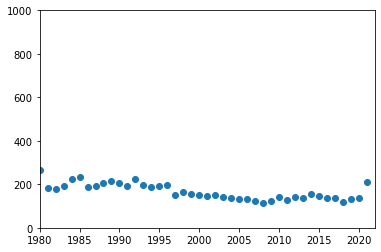

,Number of views last 7 days
Year Built,
1912.0,444.0
1940.0,350.0
1901.0,335.0
1936.0,332.4
1977.0,290.5
...,...
1953.0,47.5
1945.0,35.0
1931.0,34.0


In [8]:
year_dropped = data.replace(0,np.NaN)
year_dropped = year_dropped.dropna(subset=["Year Built"])
year = year_dropped.groupby(["Year Built"]).agg({"Number of views last 7 days":"mean"})
plt.plot(year.index,year["Number of views last 7 days"],"o")
plt.axis([1980,2022,0,1000])
plt.show()
year.sort_values("Number of views last 7 days",ascending=False)

Text(0, 0.5, 'Average number of views')

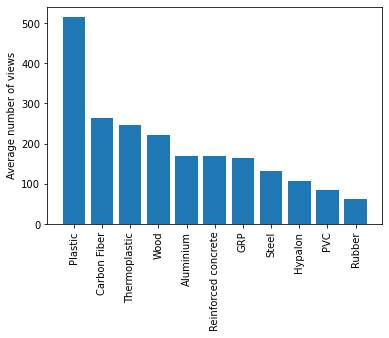

In [6]:
data["Material"].unique()
material_dropped = data.dropna(subset=["Material"])
material = material_dropped.groupby(["Material"]).agg({"Number of views last 7 days":"mean"}).sort_values("Number of views last 7 days",ascending=False)
plt.bar(material.index,material["Number of views last 7 days"])
plt.xticks(rotation=90)
plt.ylabel("Average number of views")

In [5]:
data.groupby(["Manufacturer"])["Number of views last 7 days"].sum().nlargest(10)

Manufacturer
BÃ©nÃ©teau power boats    56211
Sunseeker power boats     51110
Jeanneau power boats      51070
Sea Ray power boats       45387
Princess power boats      39051
Bavaria power boats       35569
Bayliner power boats      34555
Cranchi power boats       32442
Azimut power boats        24339
Fairline power boats      24276
Name: Number of views last 7 days, dtype: int64

In [4]:
temp = data["Price"].str.split(" ",expand =True)
data["Currency"]=temp[0]
data["price"] = temp[1]
data=data.drop("Price",axis=1)
temp_location = data["Location"].str.split(" ",expand=True)
data["location"] = temp_location[0]
data=data.drop("Location",axis=1)
data



,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,Currency,price,location
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,226,CHF,3337,Switzerland
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,EUR,3490,Germany
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,124,CHF,3770,Switzerland
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,64,DKK,25900,Denmark
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,EUR,3399,Germany
...,...,...,...,...,...,...,...,...,...,...,...
9883,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1987,6.30,2.44,NaN,1116,CHF,4900,Switzerland
9884,Sport Boat,NaN,new boat from stock,0,4.17,1.68,GRP,94,EUR,4516,Germany
9885,Sport Boat,BlueCraft power boats,"new boat from stock,Unleaded",2020,4.40,1.80,GRP,354,EUR,4499,Germany
9886,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.37,1.89,NaN,266,EUR,4300,Italy


In [10]:
data.groupby(["location"]).agg({"Number of views last 7 days":"sum"}).sort_values("Number of views last 7 days",ascending=False)

,Number of views last 7 days
location,
Switzerland,374431
Germany,286993
Italy,209958
Netherlands,121982
France,118098
...,...
Venezuela,64
Gibraltar,52
Lebanon,47
